In [1]:
## importing the necessary library


import matplotlib.pyplot as plt
import numpy as np
import math

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

import matplotlib.style #Some style nonsense
import matplotlib as mpl #Some more style nonsense


#Set default figure size
#mpl.rcParams['figure.figsize'] = [12.0, 8.0] #Inches... of course it is inches
mpl.rcParams["legend.frameon"] = False
mpl.rcParams['figure.dpi']=200 # dots per inch

#Useful for debugging problems
print(tf.__version__)

2.15.0


In [2]:
## Load the MNIST dataset
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
# normalise the image's pixel

train_images=train_images/255.0
test_images=test_images/255.0

In [4]:
# A function that adds random noise to MNIST Images which is drawn from a uniform distribution from 0 to y_noise

def Random_Noise(image,y_noise):

    # input: Image - pixel value for MNIST
    #        y_noise - the maximum value for Noise

    # output - image pixel value with noise

    Noise= np.random.uniform(0,y_noise,image.shape)

    Noise_MNIST = Noise + image

    # capping the value of Noise_MNIST to the normalised pixel value [0,1]
    #Noise_MNIST = np.clip[Noise_MNIST,0,1]

    return Noise_MNIST



In [5]:
# set up neutral network layers
# Layers Description: input of 28x28 pixel image, 2 hidden layer (one with 128 neuron with relu activation function, another with 200 neuron with linear activation), output of 10 result for imagine recognition

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(200,activation='linear'),
    keras.layers.Dense(10)
])



In [6]:
# Compiling the model with specific Loss function (Categorical Cross entropy), Optimiser (steepest gradient descent), Metrics (accuracy of model)

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=tf.keras.optimizers.SGD(lr=1.0),
              metrics=['accuracy'])

In [7]:
# Training the model
history=model.fit(train_images, train_labels,batch_size=100, epochs=30)

Epoch 1/30
600/600 [==============================] - 8s 11ms/step - loss: 0.9381 - accuracy: 0.7664
Epoch 2/30
600/600 [==============================] - 5s 8ms/step - loss: 0.4142 - accuracy: 0.8856
Epoch 3/30
600/600 [==============================] - 3s 6ms/step - loss: 0.3469 - accuracy: 0.9019
Epoch 4/30
600/600 [==============================] - 2s 3ms/step - loss: 0.3139 - accuracy: 0.9114
Epoch 5/30
600/600 [==============================] - 2s 4ms/step - loss: 0.2912 - accuracy: 0.9173
Epoch 6/30
600/600 [==============================] - 2s 4ms/step - loss: 0.2728 - accuracy: 0.9227
Epoch 7/30
600/600 [==============================] - 2s 4ms/step - loss: 0.2572 - accuracy: 0.9269
Epoch 8/30
600/600 [==============================] - 3s 5ms/step - loss: 0.2434 - accuracy: 0.9310
Epoch 9/30
600/600 [==============================] - 2s 4ms/step - loss: 0.2312 - accuracy: 0.9344
Epoch 10/30
600/600 [==============================] - 2s 4ms/step - loss: 0.2199 - accuracy: 0.937

In [8]:
# Testing the Model with test sample
test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=2)
print("The accuracy of the trained model is ", test_acc *100, "%" )

313/313 - 1s - loss: 0.1171 - accuracy: 0.9652 - 798ms/epoch - 3ms/step
The accuracy of the trained model is  96.52000069618225 %


# Add Noise to Test Sample

In [9]:

# Adding Noise to test_image and plot the accuracy vs y_noise

Number_of_y = 30
y=np.linspace(0,1,Number_of_y)
test_loss_noise = np.zeros(Number_of_y)
test_acc_noise = np.zeros(Number_of_y)

for i in range(Number_of_y):
    test_loss, test_acc = model.evaluate(Random_Noise(test_images,y[i]),  test_labels, verbose=2)

    test_loss_noise[i]=test_loss
    test_acc_noise[i]=test_acc

313/313 - 1s - loss: 0.1171 - accuracy: 0.9652 - 880ms/epoch - 3ms/step
313/313 - 1s - loss: 0.1214 - accuracy: 0.9641 - 806ms/epoch - 3ms/step
313/313 - 1s - loss: 0.1332 - accuracy: 0.9611 - 916ms/epoch - 3ms/step
313/313 - 1s - loss: 0.1541 - accuracy: 0.9565 - 691ms/epoch - 2ms/step
313/313 - 1s - loss: 0.1905 - accuracy: 0.9451 - 814ms/epoch - 3ms/step
313/313 - 0s - loss: 0.2485 - accuracy: 0.9269 - 481ms/epoch - 2ms/step
313/313 - 1s - loss: 0.3308 - accuracy: 0.8968 - 649ms/epoch - 2ms/step
313/313 - 1s - loss: 0.4496 - accuracy: 0.8476 - 566ms/epoch - 2ms/step
313/313 - 1s - loss: 0.6054 - accuracy: 0.7916 - 666ms/epoch - 2ms/step
313/313 - 1s - loss: 0.7942 - accuracy: 0.7413 - 735ms/epoch - 2ms/step
313/313 - 1s - loss: 1.0038 - accuracy: 0.7029 - 547ms/epoch - 2ms/step
313/313 - 1s - loss: 1.2513 - accuracy: 0.6670 - 887ms/epoch - 3ms/step
313/313 - 1s - loss: 1.5119 - accuracy: 0.6342 - 736ms/epoch - 2ms/step
313/313 - 1s - loss: 1.7915 - accuracy: 0.6051 - 542ms/epoch - 2

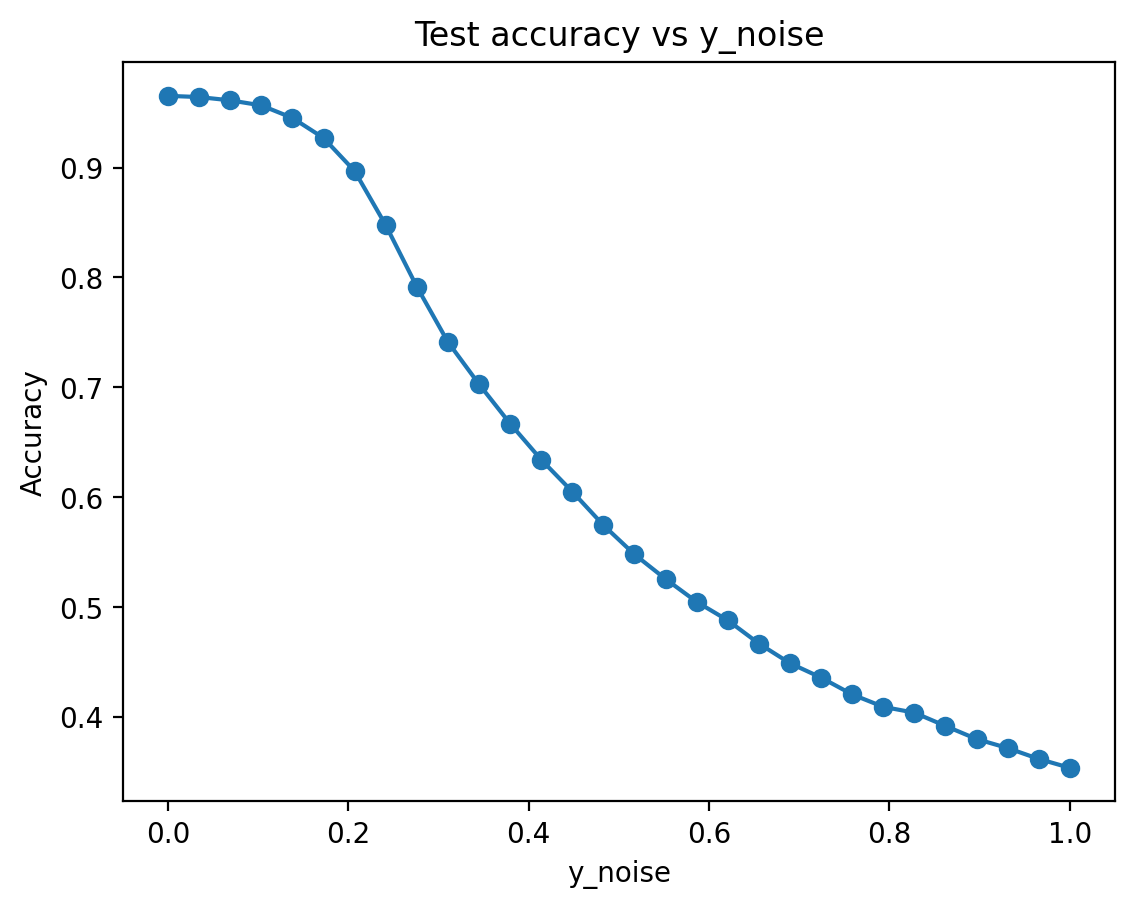

In [10]:

fig,ax=plt.subplots()
ax.plot(y,test_acc_noise,marker='o')
ax.set_xlabel('y_noise')
ax.set_ylabel('Accuracy')
ax.title.set_text('Test accuracy vs y_noise')

In [24]:
# Since the individual pixel value have been normalised to 1, adding a small perturbation can significantly affect the accuracy of the prediction.
print('The Average accuracy of the trained model is ',np.average(test_acc_noise)*100,"% .")
print('This is due to the model being overfitted to the training data.')

The Average accuracy of the trained model is  62.304999728997544 % 
This is due to the model being overfitted to the training data


## Test the Accuracy of model for very low level of noise
y_noise = 0.25

In [12]:
# set up neutral network layers for very low noise level

model_very_low_noise = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10)
])

# Compiling the model with specific Loss function, Optimiser, Metrics

model_very_low_noise.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=tf.keras.optimizers.SGD(lr=1.0),
              metrics=['accuracy'])

model_very_low_noise.fit(Random_Noise(train_images,0.2), train_labels,batch_size=100, epochs=30)

Epoch 1/30
600/600 [==============================] - 4s 6ms/step - loss: 1.0479 - accuracy: 0.7520
Epoch 2/30
600/600 [==============================] - 3s 5ms/step - loss: 0.4942 - accuracy: 0.8716
Epoch 3/30
600/600 [==============================] - 3s 6ms/step - loss: 0.4081 - accuracy: 0.8874
Epoch 4/30
600/600 [==============================] - 3s 4ms/step - loss: 0.3686 - accuracy: 0.8975
Epoch 5/30
600/600 [==============================] - 3s 4ms/step - loss: 0.3444 - accuracy: 0.9034
Epoch 6/30
600/600 [==============================] - 3s 5ms/step - loss: 0.3268 - accuracy: 0.9082
Epoch 7/30
600/600 [==============================] - 2s 4ms/step - loss: 0.3133 - accuracy: 0.9120
Epoch 8/30
600/600 [==============================] - 3s 4ms/step - loss: 0.3019 - accuracy: 0.9148
Epoch 9/30
600/600 [==============================] - 2s 4ms/step - loss: 0.2920 - accuracy: 0.9182
Epoch 10/30
600/600 [==============================] - 3s 5ms/step - loss: 0.2831 - accuracy: 0.9204

In [13]:
# test how accurate the model is when a noisy image is inputed for recognition

Number_of_y = 30

y=np.linspace(0,1,Number_of_y)
test_loss_very_low_noise = np.zeros(Number_of_y)
test_acc_very_low_noise = np.zeros(Number_of_y)

for i in range(Number_of_y):
    test_loss_very_low, test_acc_very_low = model_very_low_noise.evaluate(Random_Noise(test_images,y[i]),  test_labels, verbose=2)


    test_acc_very_low_noise[i]=test_acc_very_low

313/313 - 1s - loss: 0.1910 - accuracy: 0.9465 - 795ms/epoch - 3ms/step
313/313 - 1s - loss: 0.1860 - accuracy: 0.9481 - 531ms/epoch - 2ms/step
313/313 - 1s - loss: 0.1823 - accuracy: 0.9492 - 901ms/epoch - 3ms/step
313/313 - 1s - loss: 0.1796 - accuracy: 0.9497 - 943ms/epoch - 3ms/step
313/313 - 0s - loss: 0.1789 - accuracy: 0.9492 - 463ms/epoch - 1ms/step
313/313 - 0s - loss: 0.1781 - accuracy: 0.9492 - 465ms/epoch - 1ms/step
313/313 - 0s - loss: 0.1806 - accuracy: 0.9478 - 469ms/epoch - 1ms/step
313/313 - 0s - loss: 0.1837 - accuracy: 0.9495 - 481ms/epoch - 2ms/step
313/313 - 1s - loss: 0.1884 - accuracy: 0.9462 - 508ms/epoch - 2ms/step
313/313 - 1s - loss: 0.1936 - accuracy: 0.9453 - 716ms/epoch - 2ms/step
313/313 - 1s - loss: 0.2007 - accuracy: 0.9404 - 588ms/epoch - 2ms/step
313/313 - 1s - loss: 0.2131 - accuracy: 0.9374 - 571ms/epoch - 2ms/step
313/313 - 0s - loss: 0.2224 - accuracy: 0.9343 - 468ms/epoch - 1ms/step
313/313 - 0s - loss: 0.2418 - accuracy: 0.9257 - 446ms/epoch - 1

## Low Noise Level
y_noise = 0.5

In [14]:
# set up neutral network layers for low noise level

model_low_noise = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10)
])

# Compiling the model with specific Loss function, Optimiser, Metrics

model_low_noise.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=tf.keras.optimizers.SGD(lr=1.0),
              metrics=['accuracy'])


In [15]:
# Retrain Neural Network using training sample with some level of noise added

history=model_low_noise.fit(Random_Noise(train_images,0.5), train_labels,batch_size=100, epochs=30)


Epoch 1/30
600/600 [==============================] - 3s 5ms/step - loss: 1.0393 - accuracy: 0.7327
Epoch 2/30
600/600 [==============================] - 3s 5ms/step - loss: 0.5174 - accuracy: 0.8612
Epoch 3/30
600/600 [==============================] - 3s 6ms/step - loss: 0.4300 - accuracy: 0.8800
Epoch 4/30
600/600 [==============================] - 3s 4ms/step - loss: 0.3908 - accuracy: 0.8895
Epoch 5/30
600/600 [==============================] - 2s 4ms/step - loss: 0.3668 - accuracy: 0.8957
Epoch 6/30
600/600 [==============================] - 2s 4ms/step - loss: 0.3499 - accuracy: 0.8993
Epoch 7/30
600/600 [==============================] - 2s 4ms/step - loss: 0.3367 - accuracy: 0.9030
Epoch 8/30
600/600 [==============================] - 3s 5ms/step - loss: 0.3256 - accuracy: 0.9060
Epoch 9/30
600/600 [==============================] - 2s 4ms/step - loss: 0.3165 - accuracy: 0.9084
Epoch 10/30
600/600 [==============================] - 3s 4ms/step - loss: 0.3080 - accuracy: 0.9113

In [16]:
# Adding Noise to test_image and plot the accuracy vs y_noise


Number_of_y = 30

y=np.linspace(0,1,Number_of_y)           # low noise - y_noise = 0.5
test_loss_low_noise = np.zeros(Number_of_y)
test_acc_low_noise = np.zeros(Number_of_y)

for i in range(Number_of_y):
    test_loss_low, test_acc_low = model_low_noise.evaluate(Random_Noise(test_images,y[i]),  test_labels, verbose=2)


    test_acc_low_noise[i]=test_acc_low

313/313 - 1s - loss: 0.2195 - accuracy: 0.9391 - 601ms/epoch - 2ms/step
313/313 - 1s - loss: 0.2145 - accuracy: 0.9392 - 1s/epoch - 3ms/step
313/313 - 1s - loss: 0.2101 - accuracy: 0.9395 - 796ms/epoch - 3ms/step
313/313 - 1s - loss: 0.2063 - accuracy: 0.9411 - 530ms/epoch - 2ms/step
313/313 - 1s - loss: 0.2027 - accuracy: 0.9411 - 565ms/epoch - 2ms/step
313/313 - 1s - loss: 0.2009 - accuracy: 0.9414 - 595ms/epoch - 2ms/step
313/313 - 0s - loss: 0.1984 - accuracy: 0.9425 - 480ms/epoch - 2ms/step
313/313 - 1s - loss: 0.1974 - accuracy: 0.9433 - 576ms/epoch - 2ms/step
313/313 - 0s - loss: 0.1960 - accuracy: 0.9426 - 456ms/epoch - 1ms/step
313/313 - 0s - loss: 0.1951 - accuracy: 0.9425 - 490ms/epoch - 2ms/step
313/313 - 0s - loss: 0.1964 - accuracy: 0.9421 - 496ms/epoch - 2ms/step
313/313 - 1s - loss: 0.1973 - accuracy: 0.9423 - 508ms/epoch - 2ms/step
313/313 - 0s - loss: 0.1968 - accuracy: 0.9418 - 495ms/epoch - 2ms/step
313/313 - 1s - loss: 0.1992 - accuracy: 0.9421 - 527ms/epoch - 2ms/

## Medium Noise
y_noise=0.75

In [17]:
# set up neutral network layers

model_medium_noise = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10)
])

# Compiling the model with specific Loss function, Optimiser, Metrics

model_medium_noise.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=tf.keras.optimizers.SGD(lr=1.0),
              metrics=['accuracy'])

# Retrain Neural Network using training sample with some level of noise added

history=model_medium_noise.fit(Random_Noise(train_images,0.75), train_labels,batch_size=100, epochs=30)


Epoch 1/30
600/600 [==============================] - 3s 4ms/step - loss: 1.0897 - accuracy: 0.7094
Epoch 2/30
600/600 [==============================] - 2s 4ms/step - loss: 0.5368 - accuracy: 0.8509
Epoch 3/30
600/600 [==============================] - 3s 5ms/step - loss: 0.4487 - accuracy: 0.8709
Epoch 4/30
600/600 [==============================] - 2s 4ms/step - loss: 0.4103 - accuracy: 0.8801
Epoch 5/30
600/600 [==============================] - 2s 4ms/step - loss: 0.3872 - accuracy: 0.8873
Epoch 6/30
600/600 [==============================] - 2s 4ms/step - loss: 0.3715 - accuracy: 0.8909
Epoch 7/30
600/600 [==============================] - 2s 4ms/step - loss: 0.3591 - accuracy: 0.8945
Epoch 8/30
600/600 [==============================] - 3s 5ms/step - loss: 0.3486 - accuracy: 0.8972
Epoch 9/30
600/600 [==============================] - 3s 5ms/step - loss: 0.3396 - accuracy: 0.8999
Epoch 10/30
600/600 [==============================] - 2s 4ms/step - loss: 0.3308 - accuracy: 0.9023

In [18]:
 #Adding Noise to test_image and plot the accuracy vs y_noise

Number_of_y = 30



y=np.linspace(0,1,Number_of_y)

test_acc_medium_noise = np.zeros(Number_of_y)

for i in range(Number_of_y):
    _, test_acc_medium = model_medium_noise.evaluate(Random_Noise(test_images,y[i]),  test_labels, verbose=2)

    test_acc_medium_noise[i]=test_acc_medium

313/313 - 1s - loss: 0.2469 - accuracy: 0.9326 - 641ms/epoch - 2ms/step
313/313 - 0s - loss: 0.2415 - accuracy: 0.9339 - 470ms/epoch - 2ms/step
313/313 - 0s - loss: 0.2362 - accuracy: 0.9342 - 481ms/epoch - 2ms/step
313/313 - 0s - loss: 0.2324 - accuracy: 0.9353 - 464ms/epoch - 1ms/step
313/313 - 1s - loss: 0.2285 - accuracy: 0.9371 - 531ms/epoch - 2ms/step
313/313 - 0s - loss: 0.2249 - accuracy: 0.9390 - 478ms/epoch - 2ms/step
313/313 - 0s - loss: 0.2227 - accuracy: 0.9379 - 466ms/epoch - 1ms/step
313/313 - 1s - loss: 0.2199 - accuracy: 0.9390 - 587ms/epoch - 2ms/step
313/313 - 1s - loss: 0.2166 - accuracy: 0.9408 - 617ms/epoch - 2ms/step
313/313 - 1s - loss: 0.2178 - accuracy: 0.9379 - 739ms/epoch - 2ms/step
313/313 - 1s - loss: 0.2152 - accuracy: 0.9378 - 655ms/epoch - 2ms/step
313/313 - 1s - loss: 0.2127 - accuracy: 0.9390 - 1s/epoch - 5ms/step
313/313 - 1s - loss: 0.2133 - accuracy: 0.9390 - 538ms/epoch - 2ms/step
313/313 - 0s - loss: 0.2141 - accuracy: 0.9394 - 494ms/epoch - 2ms/

## High Level Noise
y_noise = 1

In [19]:
#set up neutral network layers

model_high_noise = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10)
])

# Compiling the model with specific Loss function, Optimiser, Metrics

model_high_noise.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=tf.keras.optimizers.SGD(lr=1.0),
              metrics=['accuracy'])

# Retrain Neural Network using training sample with some level of noise added

history=model_high_noise.fit(Random_Noise(train_images,1), train_labels,batch_size=100, epochs=30)


Epoch 1/30
600/600 [==============================] - 3s 4ms/step - loss: 1.1218 - accuracy: 0.6724
Epoch 2/30
600/600 [==============================] - 2s 4ms/step - loss: 0.5721 - accuracy: 0.8352
Epoch 3/30
600/600 [==============================] - 4s 7ms/step - loss: 0.4840 - accuracy: 0.8566
Epoch 4/30
600/600 [==============================] - 2s 3ms/step - loss: 0.4441 - accuracy: 0.8685
Epoch 5/30
600/600 [==============================] - 2s 3ms/step - loss: 0.4198 - accuracy: 0.8754
Epoch 6/30
600/600 [==============================] - 2s 4ms/step - loss: 0.4027 - accuracy: 0.8795
Epoch 7/30
600/600 [==============================] - 2s 3ms/step - loss: 0.3888 - accuracy: 0.8833
Epoch 8/30
600/600 [==============================] - 4s 7ms/step - loss: 0.3775 - accuracy: 0.8877
Epoch 9/30
600/600 [==============================] - 2s 3ms/step - loss: 0.3676 - accuracy: 0.8906
Epoch 10/30
600/600 [==============================] - 2s 3ms/step - loss: 0.3588 - accuracy: 0.8929

In [20]:
Number_of_y = 30



y=np.linspace(0,1,Number_of_y)

test_acc_high_noise = np.zeros(Number_of_y)

for i in range(Number_of_y):
    _, test_acc_high = model_high_noise.evaluate(Random_Noise(test_images,y[i]),  test_labels, verbose=2)

    test_acc_high_noise[i]=test_acc_high

313/313 - 1s - loss: 0.2629 - accuracy: 0.9338 - 592ms/epoch - 2ms/step
313/313 - 0s - loss: 0.2568 - accuracy: 0.9340 - 463ms/epoch - 1ms/step
313/313 - 0s - loss: 0.2517 - accuracy: 0.9341 - 499ms/epoch - 2ms/step
313/313 - 1s - loss: 0.2460 - accuracy: 0.9355 - 747ms/epoch - 2ms/step
313/313 - 0s - loss: 0.2423 - accuracy: 0.9346 - 493ms/epoch - 2ms/step
313/313 - 0s - loss: 0.2390 - accuracy: 0.9352 - 478ms/epoch - 2ms/step
313/313 - 0s - loss: 0.2364 - accuracy: 0.9361 - 470ms/epoch - 2ms/step
313/313 - 0s - loss: 0.2343 - accuracy: 0.9342 - 471ms/epoch - 2ms/step
313/313 - 0s - loss: 0.2324 - accuracy: 0.9365 - 461ms/epoch - 1ms/step
313/313 - 1s - loss: 0.2320 - accuracy: 0.9369 - 587ms/epoch - 2ms/step
313/313 - 1s - loss: 0.2284 - accuracy: 0.9352 - 640ms/epoch - 2ms/step
313/313 - 1s - loss: 0.2308 - accuracy: 0.9377 - 588ms/epoch - 2ms/step
313/313 - 1s - loss: 0.2307 - accuracy: 0.9353 - 550ms/epoch - 2ms/step
313/313 - 1s - loss: 0.2286 - accuracy: 0.9335 - 536ms/epoch - 2

### Plot of how the different noise level trained model performed across different y_noise

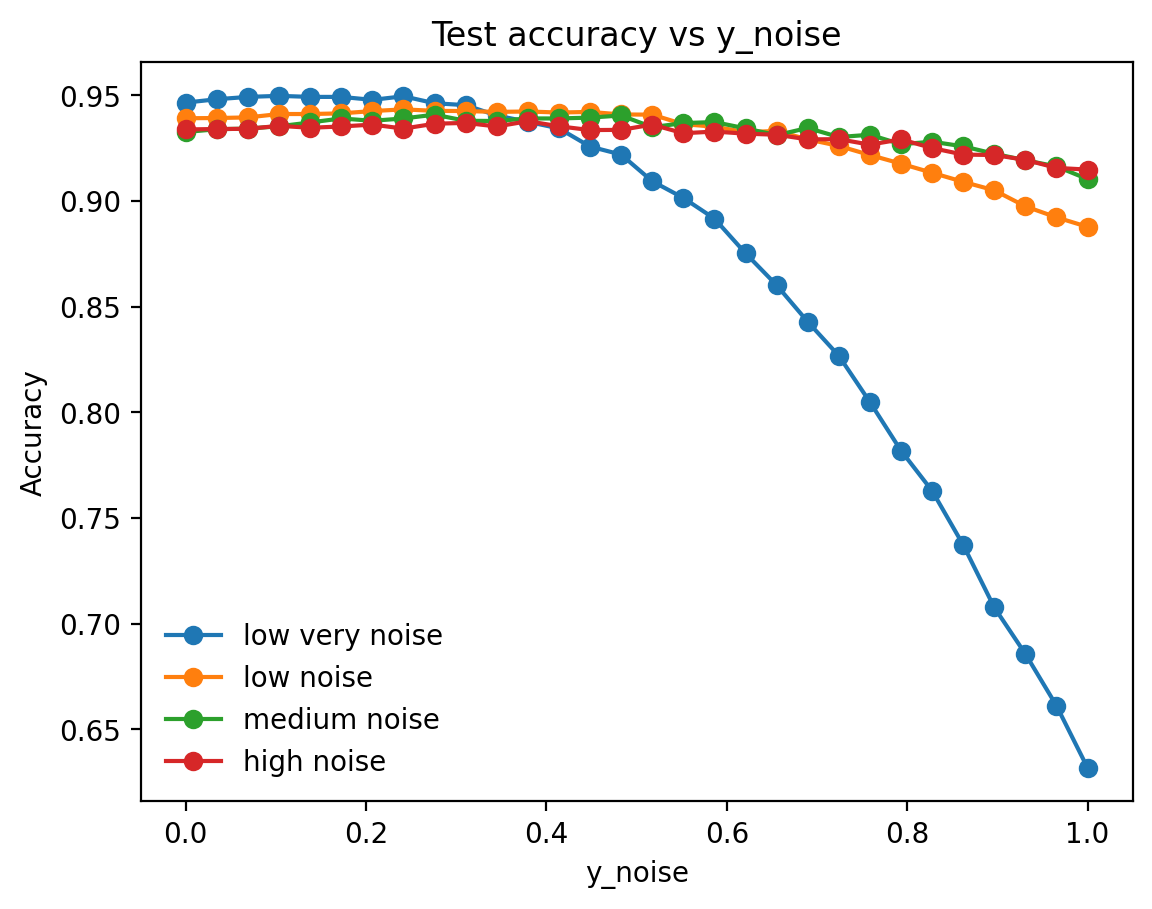

In [21]:
fig,ax=plt.subplots()
ax.plot(y,test_acc_very_low_noise,marker='o',label='low very noise')
ax.plot(y,test_acc_low_noise,marker='o',label='low noise')
ax.plot(y,test_acc_medium_noise,marker='o',label='medium noise')
ax.plot(y,test_acc_high_noise,marker='o',label='high noise')
ax.set_xlabel('y_noise')
ax.set_ylabel('Accuracy')
ax.title.set_text('Test accuracy vs y_noise')
ax.legend()

## Performance
Given that the model is trained under a specific noise, we could define the performance of the trained model to be the average accuracy of the trained model to correctly recognise the noisy test sample across the whole regime of noise level. The reason to define the performance of the trained model as sugeested is because by adding noise during the training of model we essentially trying to prevent overfitting and making the model more robust to variations in input data. This ensures that the model is training to learn the trend of the data but not memorising the data.

In [22]:
print("The average accuracy of the model which has been trained with low noise level is ", np.average(test_acc_very_low_noise))
print("The average accuracy of the model which has been trained with low noise level is ", np.average(test_acc_low_noise))
print("The average accuracy of the model which has been trained with medium noise level is ", np.average(test_acc_medium_noise))
print("The average accuracy of the model which has been trained with high noise level is ", np.average(test_acc_high_noise))

The average accuracy of the model which has been trained with low noise level is  0.8673366586367289
The average accuracy of the model which has been trained with low noise level is  0.9299433310826619
The average accuracy of the model which has been trained with medium noise level is  0.9327466686566671
The average accuracy of the model which has been trained with high noise level is  0.9307533264160156


## Best Level of noise
The best level of noise to add to the training dataset to maximise the performance is y_noise = 0.5 to 1 which corresponds to a noise with uniform distribution from 0 to half the value of the pixel / the value of the pixel.

NameError: name 'test_acc_2high_noise' is not defined